# Import Liblary

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Upload datasest

In [88]:
data_jamur_df = pd.read_csv('data/mushrooms.csv')
data_jamur_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Prapemerosesan Data

In [89]:
# Cek Missing Value Data
data_jamur_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [90]:
# cek statistik deskriptif
data_jamur_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [91]:
# menampilkan fitur dan label
data_jamur_df['class']

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [92]:
# cek statistik label target data
data_jamur_df['class'].describe()

count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

In [93]:
# menghitung persentase data jamur beracun dan tidak
data_jamur_df['class'].value_counts(normalize=True) 
# e -> jamur yang layak dimakan 
# p -> jamur yang tidak layak dimakan

class
e    0.517971
p    0.482029
Name: proportion, dtype: float64

**Explorasi Nilai Unik**

In [94]:
for col in ['odor', 'gill-size', 'bruises', 'veil-color', 'ring-type']:
    print(f"Unique values for {col}: {data_jamur_df[col].unique()}")

Unique values for odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values for gill-size: ['n' 'b']
Unique values for bruises: ['t' 'f']
Unique values for veil-color: ['w' 'n' 'o' 'y']
Unique values for ring-type: ['p' 'e' 'l' 'f' 'n']


**One-hot-encoding**

In [95]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(data_jamur_df[['odor', 'gill-size', 'bruises', 'veil-color', 'ring-type']])

# Konversi ke DataFrame jika perlu
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())
encoded_df

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-size_b,...,bruises_t,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8121,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# Visualisasi Data

**Analisis Korelasi & Visualisasi**

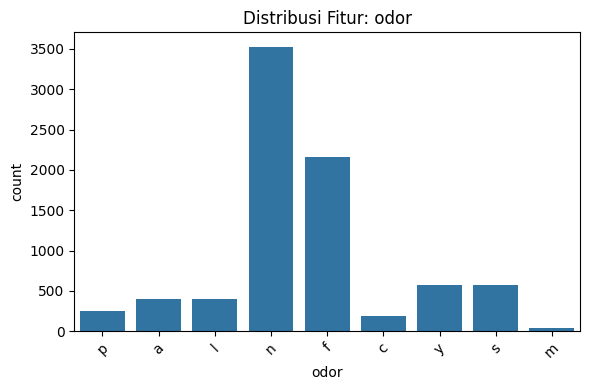

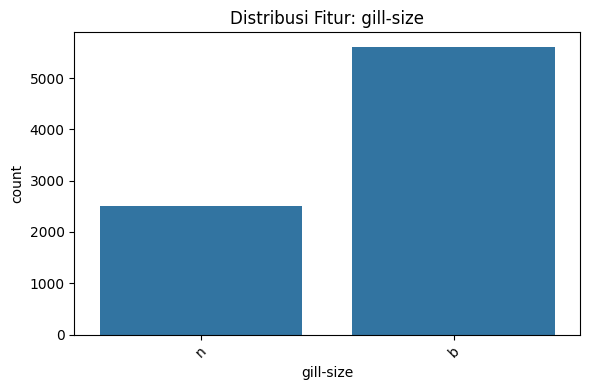

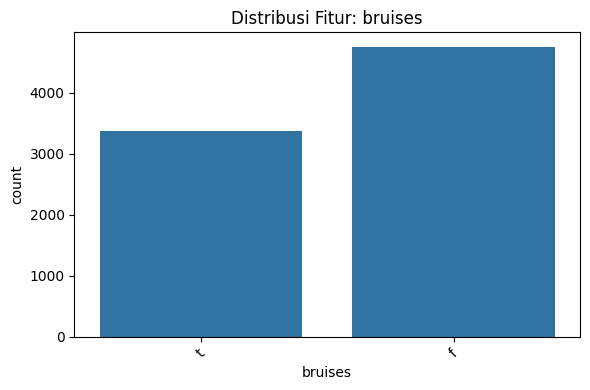

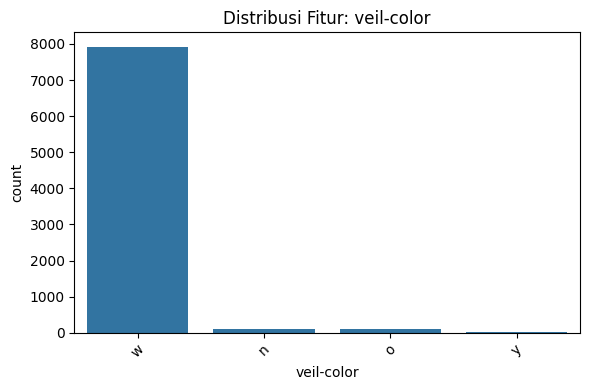

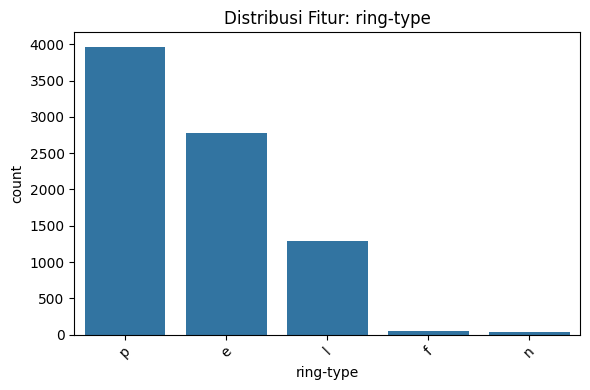

In [96]:
# Distribusi Tiap Fitur Kategorikal
fitur_utama = ['odor', 'gill-size', 'bruises', 'veil-color', 'ring-type']

for col in fitur_utama:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data_jamur_df)
    plt.title(f'Distribusi Fitur: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

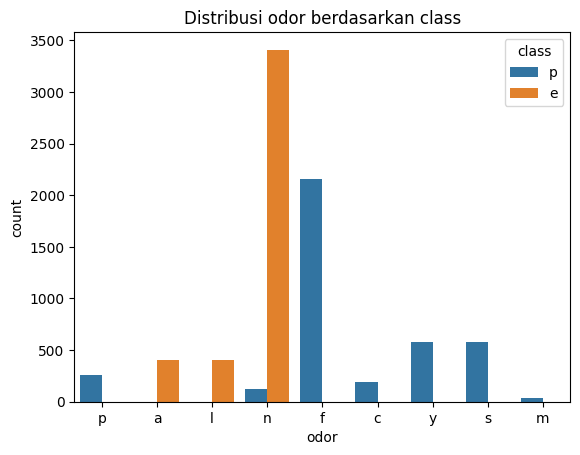

In [97]:
# Hubungan Fitur vs Label
sns.countplot(x='odor', hue='class', data=data_jamur_df)
plt.title('Distribusi odor berdasarkan class')
plt.show()

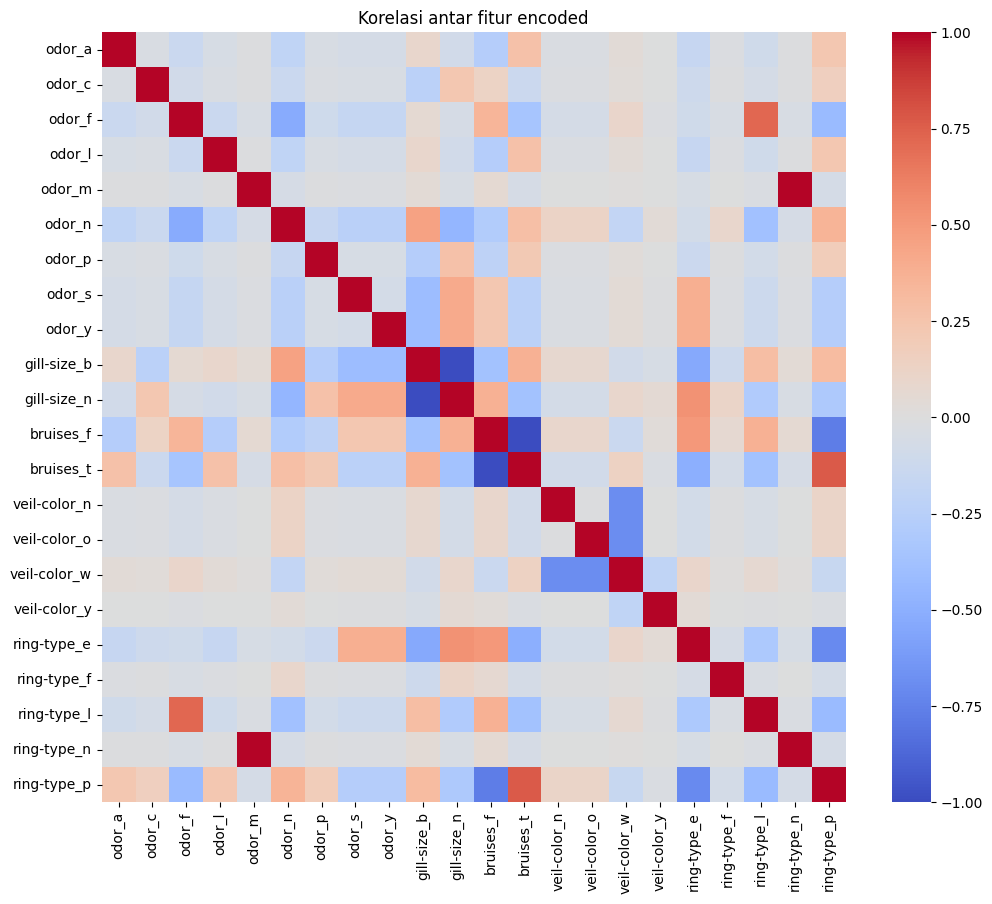

In [98]:
# Korelasi Antar Fitur (Setelah One-Hot Encoding)
encoded_df_corr = encoded_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(encoded_df_corr, cmap='coolwarm')
plt.title('Korelasi antar fitur encoded')
plt.show()

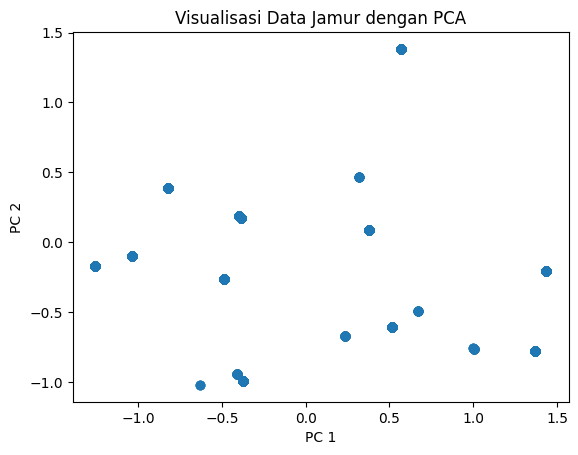

In [99]:
# PCA atau t-SNE untuk Visualisasi Dimensi
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_df)

plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('Visualisasi Data Jamur dengan PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# Membuat Model dan latih Model Machine Learning

In [100]:
# membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

x = encoded_df # Fitur hasil encoding
y = data_jamur_df['class'] # Label: edible vs poisonous

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [101]:
x

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-size_b,...,bruises_t,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8121,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [102]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [103]:
x.shape

(8124, 22)

In [104]:
y.shape

(8124,)

In [105]:
X = np.array([pd.to_numeric(i, errors='coerce') for i in x.values.flatten()]).reshape(x.shape).astype('float32')
y = pd.to_numeric(y, errors='coerce').astype('float32')

In [106]:
X

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [107]:
# Melatih Model ML
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [108]:
model_accuraty = model.score(X_test, y_test)
model_accuraty

0.9858461538461538

In [109]:
# Ganti y_pred_decision dengan y_pred_proba
y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


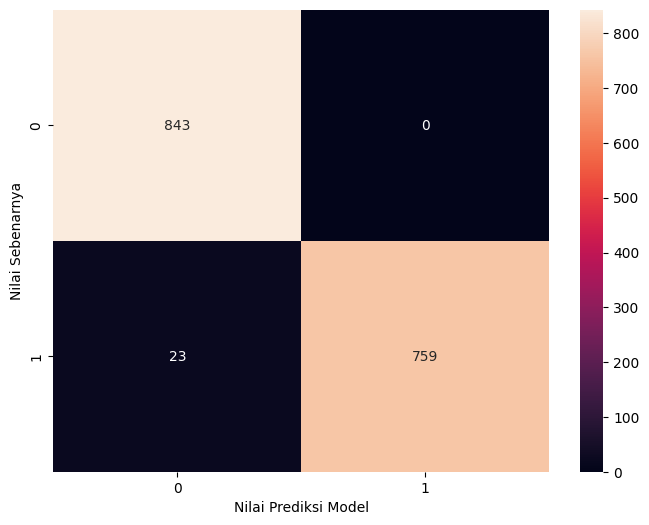

In [110]:
# visualisasi matrix confusion
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Nilai Prediksi Model")
plt.ylabel("Nilai Sebenarnya")
plt.show()

In [111]:
# Evaluasi Performa Model
from sklearn.metrics import classification_report, accuracy_score

print("Laporan Hasil Klasifikasi:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) 

accuracy = accuracy_score(y_test, y_pred)

print("Skor Yang Dihasilkan Oleh Model Random Forest")
accuracy_percentage = accuracy * 100
print(f"Nilai Akurasi: {accuracy_percentage:.2f}%")

Laporan Hasil Klasifikasi:
              precision    recall  f1-score   support

           e       0.97      1.00      0.99       843
           p       1.00      0.97      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Skor Yang Dihasilkan Oleh Model Random Forest
Nilai Akurasi: 98.58%


In [112]:
# Bandingkan Akurasi Training vs Test
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Akurasi Training: {train_accuracy:.2f}")
print(f"Akurasi Test: {test_accuracy:.2f}")

Akurasi Training: 0.99
Akurasi Test: 0.99


**Menyimpan Model Machine Learning**

In [113]:
# Simpan Model & Siapkan untuk API
import joblib
joblib.dump(model, 'model_jamur.pkl')
joblib.load('model_jamur.pkl')

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
